# **Drug Labels and Side effect**


## Import required libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

These libraries are commonly used together in EDA:

- pandas → Load, clean, and process data.

- numpy → Perform calculations on numerical data.

- matplotlib → Create visualizations (histograms, bar charts, scatter plots, etc.)

## Import and Inspect the Data


In [4]:
df = pd.read_csv("drug_side_effect.csv")
df

,drug_name,manufacturer,approval_year,drug_class,indications,side_effects,dosage_mg,administration_route,contraindications,warnings,price_usd,batch_number,expiry_date,side_effect_severity,approval_status
0,Seroxetine50,AstraZeneca,1996,Antidepressant,Allergy relief,"Fatigue, Nausea",260,Rectal,Bleeding disorders,Avoid alcohol,192.43,MV388Pl,2026-11-29,Mild,Pending
1,Mecoparin93,AstraZeneca,2018,Vaccine,Allergy relief,Nausea,470,Inhalation,Allergic reaction,Take with food,397.82,UR279ZN,2027-07-14,Mild,Approved
2,Daxozole89,Merck & Co.,1997,Antipsychotic,Allergy relief,"Diarrhea, Blurred vision, Dizziness",330,Sublingual,High blood pressure,Take with food,131.69,we040kH,2028-06-02,Moderate,Pending
3,Viracillin84,Roche Holding AG,2004,Antifungal,Inflammation reduction,"Fatigue, Dry mouth",450,Oral,Kidney impairment,Do not operate machinery,372.82,hO060rh,2026-07-07,Mild,Rejected
4,Amoxstatin62,Pfizer Inc.,2003,Antidepressant,Psychosis control,"Insomnia, Dry mouth, Fatigue",430,Topical,Bleeding disorders,Do not operate machinery,281.48,Fa621Sw,2027-12-28,Moderate,Pending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Mecozole92,Pfizer Inc.,1993,Antihistamine,Fungal infections,Dry mouth,850,Inhalation,Liver disease,May affect fertility,47.48,Kv961uR,2026-01-20,Moderate,Rejected
1432,Amoxvir17,GlaxoSmithKline,2010,Antihistamine,Fungal infections,"Nausea, Fatigue, Headache",880,Inhalation,Diabetes,May affect fertility,235.37,Uc964RO,2027-09-28,Severe,Rejected
1433,Zylovir17,Pfizer Inc.,2007,Antibiotic,Fever reduction,"Insomnia, Dizziness",960,Topical,Asthma,Do not operate machinery,145.09,Fq361YH,2026-02-08,Moderate,Rejected
1434,Mecoprofen32,GlaxoSmithKline,1994,Antifungal,Bacterial infections,Headache,670,Topical,Asthma,May cause drowsiness,263.19,qM405ML,2028-05-13,Severe,Pending


- **Dataset loaded:** `drug_side_effect.csv`
- **Size:** 1436 rows × 15 columns
- **Columns likely included:** `drug_name`, `manufacturer`, `approval_year`, `drug_class`, `indications`, `side_effects`, `dosage_mg`, `administration_route`, `contraindications`, `warnings`, `price_usd`, `batch_number`, `expiry_date`, `side_effect_severity`, `approval_status` (from previous context).

✅ **Insight:** Dataset is intact, ready for preprocessing, encoding, or analysis. No information yet on missing values or duplicates.

# Getting Insights About The Dataset

In [6]:
df.shape

(1436, 15)

- Dataset is medium-small → RF can handle it.

- Feature space will expand a lot after encoding → fine, but monitor importance and sparsity.


In [7]:
df.nunique()


drug_name               1337
manufacturer              10
approval_year             35
drug_class                10
indications               10
side_effects             435
dosage_mg                 99
administration_route       7
contraindications         10
warnings                  10
price_usd               1415
batch_number            1436
expiry_date              806
side_effect_severity       3
approval_status            3
dtype: int64

👉 Key insight:

- Dataset is very wide in unique drugs (1337) and prices (1415) → almost continuous.

- Categorical variables are mostly small sets (7–10 uniques), which are easy to encode.

- batch_number is useless for ML, drop it.

- side_effects is high-cardinality (435), so careful encoding needed (maybe hashing or embedding).

- Strong candidates for features: manufacturer, drug_class, indications, dosage_mg, administration_route, side_effect_severity, approval_status.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   drug_name             1436 non-null   object 
 1   manufacturer          1436 non-null   object 
 2   approval_year         1436 non-null   int64  
 3   drug_class            1436 non-null   object 
 4   indications           1436 non-null   object 
 5   side_effects          1436 non-null   object 
 6   dosage_mg             1436 non-null   int64  
 7   administration_route  1436 non-null   object 
 8   contraindications     1436 non-null   object 
 9   warnings              1436 non-null   object 
 10  price_usd             1436 non-null   float64
 11  batch_number          1436 non-null   object 
 12  expiry_date           1436 non-null   object 
 13  side_effect_severity  1436 non-null   object 
 14  approval_status       1436 non-null   object 
dtypes: float64(1), int64(

#### 👉 Key insight:

- Rows & Columns: 1,436 rows × 15 columns.

- Nulls: None — every column is fully filled. That’s clean.

- Data types:

    - Numeric: approval_year (int), dosage_mg (int), price_usd (float).

    - Categorical/Text: 12 columns (like drug_name, manufacturer, indications, side_effects, etc.).

- Dates: expiry_date is stored as object → means it’s text, not an actual date yet. You’ll probably want to convert it to datetime.

- Memory footprint: ~168 KB → pretty small, easy to work with.

In [9]:
df.head()


,drug_name,manufacturer,approval_year,drug_class,indications,side_effects,dosage_mg,administration_route,contraindications,warnings,price_usd,batch_number,expiry_date,side_effect_severity,approval_status
0,Seroxetine50,AstraZeneca,1996,Antidepressant,Allergy relief,"Fatigue, Nausea",260,Rectal,Bleeding disorders,Avoid alcohol,192.43,MV388Pl,2026-11-29,Mild,Pending
1,Mecoparin93,AstraZeneca,2018,Vaccine,Allergy relief,Nausea,470,Inhalation,Allergic reaction,Take with food,397.82,UR279ZN,2027-07-14,Mild,Approved
2,Daxozole89,Merck & Co.,1997,Antipsychotic,Allergy relief,"Diarrhea, Blurred vision, Dizziness",330,Sublingual,High blood pressure,Take with food,131.69,we040kH,2028-06-02,Moderate,Pending
3,Viracillin84,Roche Holding AG,2004,Antifungal,Inflammation reduction,"Fatigue, Dry mouth",450,Oral,Kidney impairment,Do not operate machinery,372.82,hO060rh,2026-07-07,Mild,Rejected
4,Amoxstatin62,Pfizer Inc.,2003,Antidepressant,Psychosis control,"Insomnia, Dry mouth, Fatigue",430,Topical,Bleeding disorders,Do not operate machinery,281.48,Fa621Sw,2027-12-28,Moderate,Pending


#### ⚡ In short: df.head() gives the sneak peek into what the dataset actually looks like at first 5 rows

# Handling Missing Values

In [10]:
missing = df.isnull().any().sum()
missing

np.int64(0)

👉 There are 0 columns with missing values.

- df.isnull() → checks for NaN (missing values).

- .any() → checks if any NaN exists in each column.

- .sum() → counts how many columns have at least one missing value.

- Result = 0 → means all 15 columns are fully filled across 1436 rows.

In [11]:
duplicate = df.duplicated().sum()
duplicate

np.int64(0)

👉 There are 0 duplicate rows in your dataset.

- df.duplicated() → flags rows that are exact duplicates of a previous row.

- .sum() → counts how many such duplicates exist.

- Result = 0 → every row is unique.

⚡ Insight: Dataset is clean — no duplicates, no missing values. We can jump straight into feature engineering and analysis without doing heavy cleaning.

In [12]:
df.describe()

,approval_year,dosage_mg,price_usd
count,1436.000000,1436.000000,1436.000000
mean,2006.860028,509.637883,251.844854
std,10.167067,286.417268,142.640781
min,1990.000000,10.000000,1.210000
25%,1998.000000,270.000000,128.830000
50%,2007.000000,515.000000,255.130000
75%,2016.000000,760.000000,372.207500
max,2024.000000,990.000000,499.060000


- approval_year: Ranges from 1990 → 2024, average around 2007.

- dosage_mg: From 10 mg → 990 mg, average dose ~510 mg.

- price_usd: From $1.21 → $499.06, average ~$252.

👉 Data looks clean (no missing/duplicate values).

# Drop irrelevant columns


In [13]:
columns_to_drop = [ "price_usd", "batch_number", "manufacturer", "approval_year", "administration_route", "drug_name"]

df.drop(columns = columns_to_drop, inplace = True, errors = "ignore")
df

,drug_class,indications,side_effects,dosage_mg,contraindications,warnings,expiry_date,side_effect_severity,approval_status
0,Antidepressant,Allergy relief,"Fatigue, Nausea",260,Bleeding disorders,Avoid alcohol,2026-11-29,Mild,Pending
1,Vaccine,Allergy relief,Nausea,470,Allergic reaction,Take with food,2027-07-14,Mild,Approved
2,Antipsychotic,Allergy relief,"Diarrhea, Blurred vision, Dizziness",330,High blood pressure,Take with food,2028-06-02,Moderate,Pending
3,Antifungal,Inflammation reduction,"Fatigue, Dry mouth",450,Kidney impairment,Do not operate machinery,2026-07-07,Mild,Rejected
4,Antidepressant,Psychosis control,"Insomnia, Dry mouth, Fatigue",430,Bleeding disorders,Do not operate machinery,2027-12-28,Moderate,Pending
...,...,...,...,...,...,...,...,...,...
1431,Antihistamine,Fungal infections,Dry mouth,850,Liver disease,May affect fertility,2026-01-20,Moderate,Rejected
1432,Antihistamine,Fungal infections,"Nausea, Fatigue, Headache",880,Diabetes,May affect fertility,2027-09-28,Severe,Rejected
1433,Antibiotic,Fever reduction,"Insomnia, Dizziness",960,Asthma,Do not operate machinery,2026-02-08,Moderate,Rejected
1434,Antifungal,Bacterial infections,Headache,670,Asthma,May cause drowsiness,2028-05-13,Severe,Pending


### **Code Explanation**

1. `columns_to_drop = [...]`
    -  defining which columns you consider **not useful** for your model.
    - These are mostly **identifiers or less predictive features**:
        - `price_usd` → probably too noisy, almost unique per drug.
        - `batch_number` → unique for every row, useless for learning patterns.
        - `manufacturer` → only 10 categories, could be predictive but you decided to drop.
        - `approval_year` → numeric but may not be relevant.
        - `administration_route` → might be categorical, dropped for simplicity.
        - `drug_name` → unique identifier, not predictive.
2. `df.drop(..., inplace=True, errors="ignore")`
    - `inplace=True` → updates `df` directly, doesn’t create a new DataFrame.
    - `errors="ignore"` → avoids errors if some columns don’t exist (safe coding practice).

### **Insight**

1. **Noise reduction:** Dropping unique identifiers and irrelevant features prevents the model from learning “fake patterns.”
2. **Focus on signal:** You’re keeping features that directly describe the drug properties and likely impact side effect severity.
3. **Next step:**
    - Convert categorical columns (`drug_class`, `indications`, `side_effects`, etc.) into numeric using One-Hot or Ordinal Encoding.
    - Convert `expiry_date` to datetime → maybe extract days until expiry as numeric.
    - `side_effect_severity` → ordinal encode as 0,1,2.

# Data Visualisation


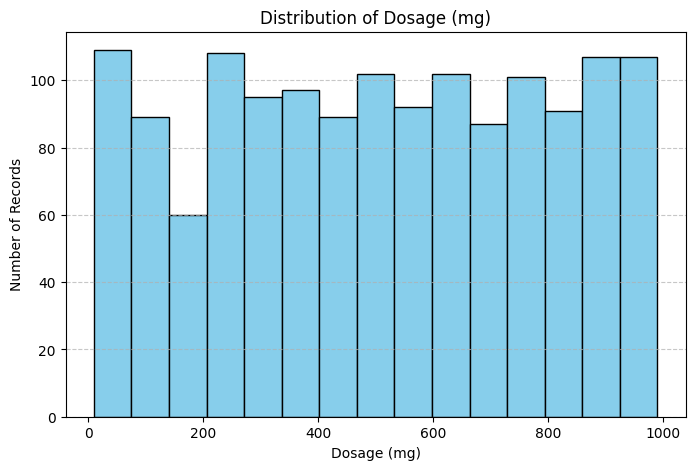

In [14]:
plt.figure(figsize=(8,5))  # sets the size of the plot
plt.hist(df["dosage_mg"], bins=15, edgecolor="black", color="skyblue")  # creates histogram
plt.title("Distribution of Dosage (mg)")  # title of the plot
plt.xlabel("Dosage (mg)")  # x-axis label
plt.ylabel("Number of Records")  # y-axis label
plt.grid(axis="y", linestyle="--", alpha=0.7)  # adds horizontal grid lines
plt.show()  # displays the plot


### Insight from the Plot

- Shows how drug dosages are distributed across your dataset.

- see clusters around common doses (e.g., ~250 mg, ~500 mg, ~750 mg).

- Helps identify outliers or rarely used dosages (like extreme low or high).

- Useful for feature understanding before training your model — e.g., if most drugs are around 500 mg, extreme values might have a different impact on side effects.

All columns: ['drug_class', 'indications', 'side_effects', 'dosage_mg', 'contraindications', 'warnings', 'expiry_date', 'side_effect_severity', 'approval_status']


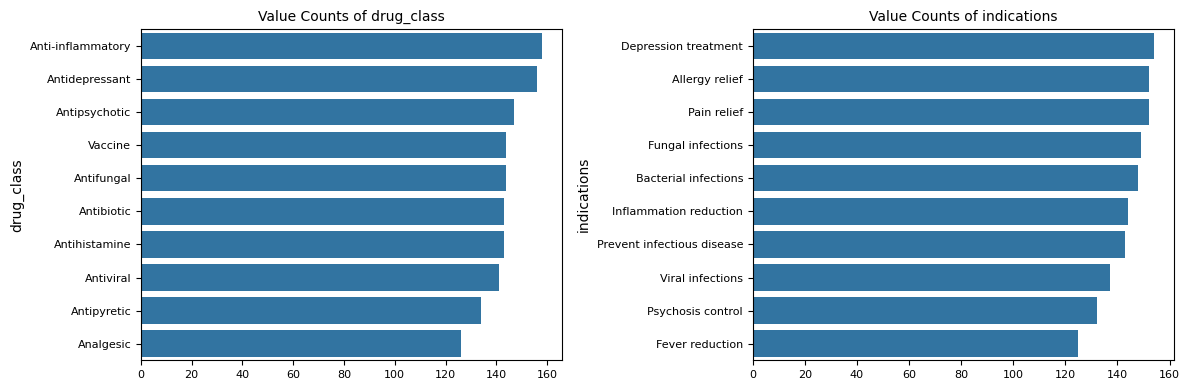

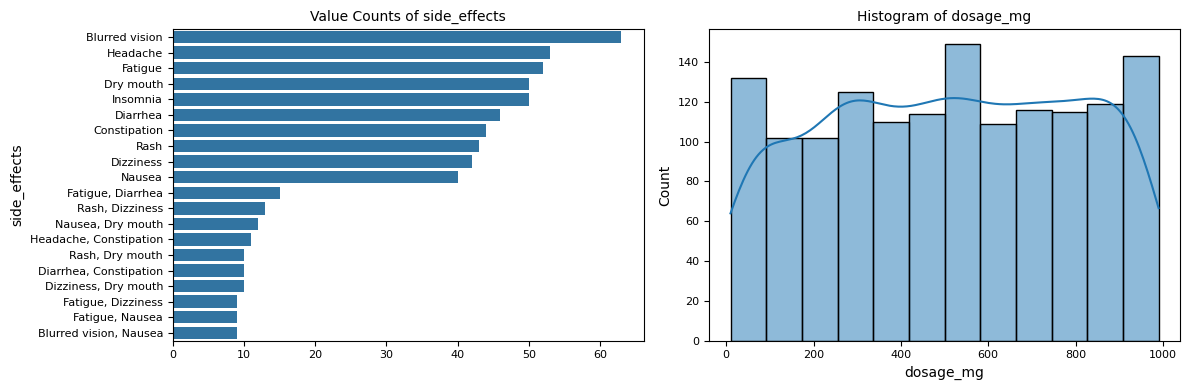

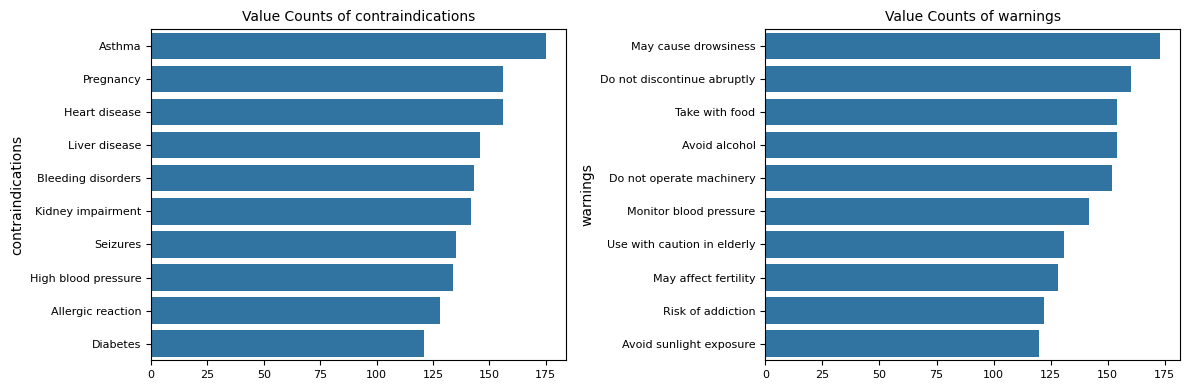

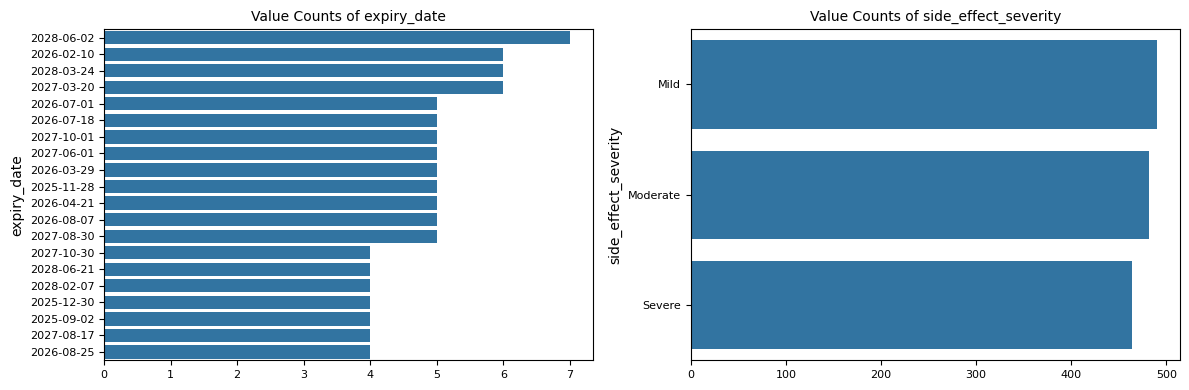

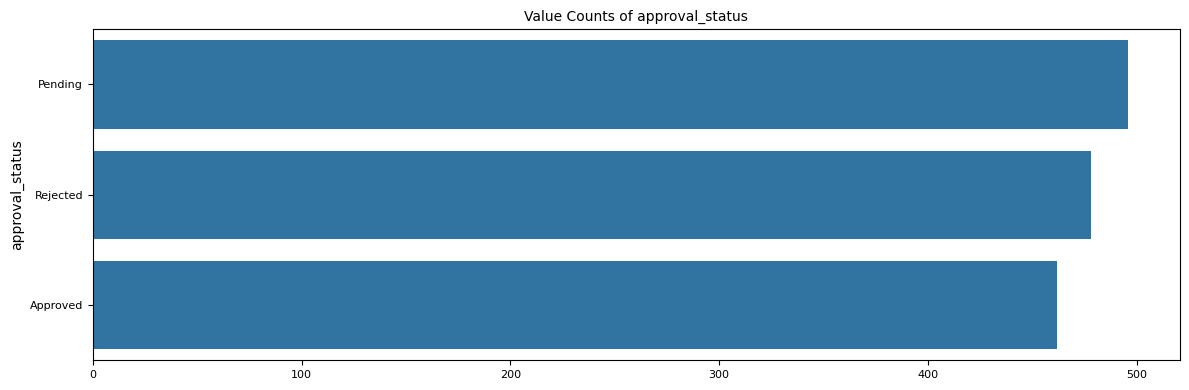

In [15]:
import seaborn as sns

# Get all columns
all_cols = df.columns.tolist()
print("All columns:", all_cols)

# Plot in pairs
for i in range(0, len(all_cols), 2):
    cols_pair = all_cols[i:i+2]
    fig, axes = plt.subplots(1, len(cols_pair), figsize=(12, 4))

    if len(cols_pair) == 1:  # If last batch has only 1 column
        axes = [axes]

    for ax, col in zip(axes, cols_pair):
        if df[col].dtype in ['int64', 'float64']:  # Numeric column
            sns.histplot(df[col], kde=True, ax=ax)
            ax.set_title(f'Histogram of {col}', fontsize=10)
        else:  # Categorical column
            top_counts = df[col].value_counts().head(20)  # Show top 20 categories
            sns.barplot(x=top_counts.values, y=top_counts.index, ax=ax)
            ax.set_title(f'Value Counts of {col}', fontsize=10)

        ax.tick_params(axis='both', labelsize=8)

    plt.tight_layout()
    plt.show()


- **Imports**:
    - `matplotlib.pyplot` → for plotting
    - `seaborn` → for prettier charts
- **Get all columns**:
    - `all_cols = df.columns.tolist()` → stores all column names in a list
- **Loop in pairs**:
    - Iterates through columns **2 at a time**
    - Example: `[A, B]`, `[C, D]`, `[E]`
- **Create subplots**:
    - `plt.subplots(1, len(cols_pair), figsize=(12, 4))` → makes 1 row of plots
    - Handles case when only 1 column is left (`axes = [axes]`)
- **For each column**:
    - **If numeric (`int64`, `float64`)** → plot histogram with KDE curve
    - **If categorical (string/object)** → plot barplot of **top 20 categories**
- **Formatting**:
    - Set titles → `Histogram of {col}` or `Value Counts of {col}`
    - Shrinks tick label size (`labelsize=8`)
- **Final touches**:
    - `plt.tight_layout()` → avoids overlapping
    - `plt.show()` → displays the plots

Categorical columns: ['drug_class', 'indications', 'side_effects', 'contraindications', 'warnings', 'expiry_date', 'side_effect_severity', 'approval_status']


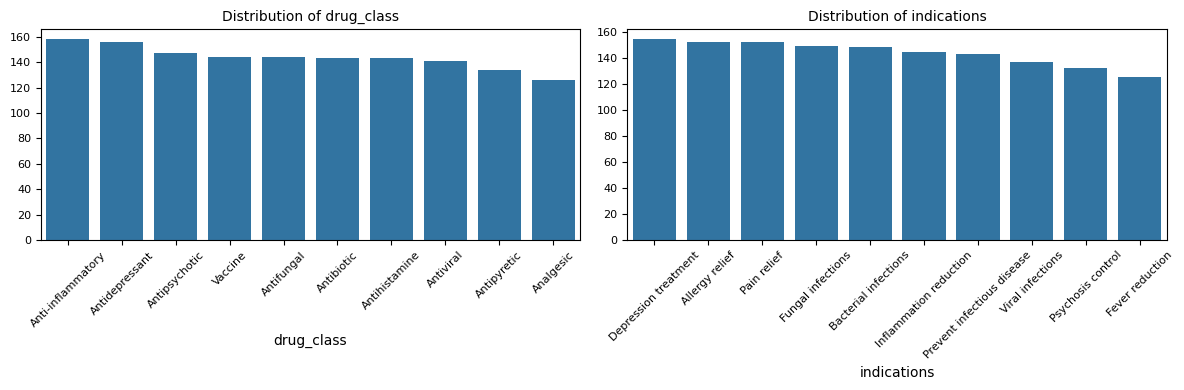

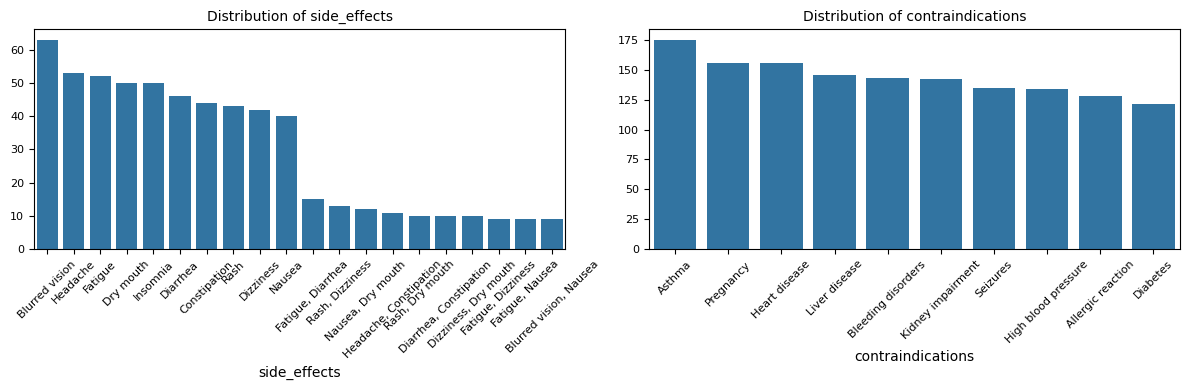

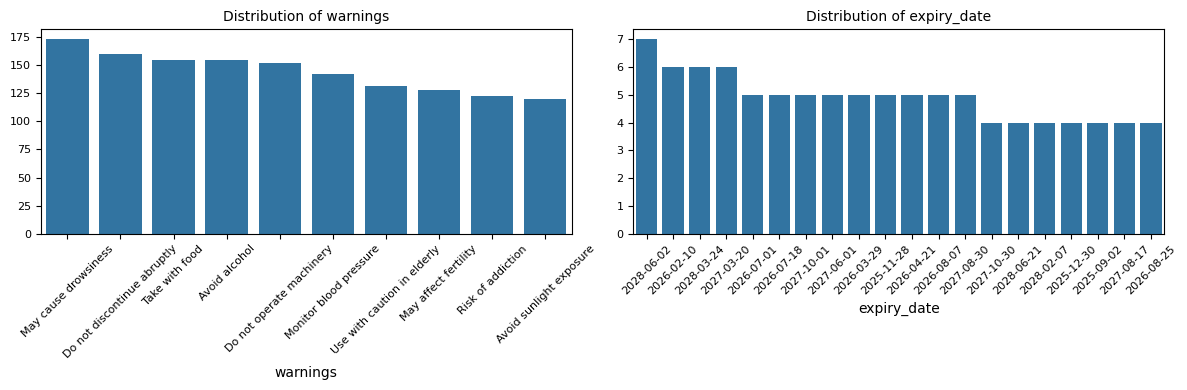

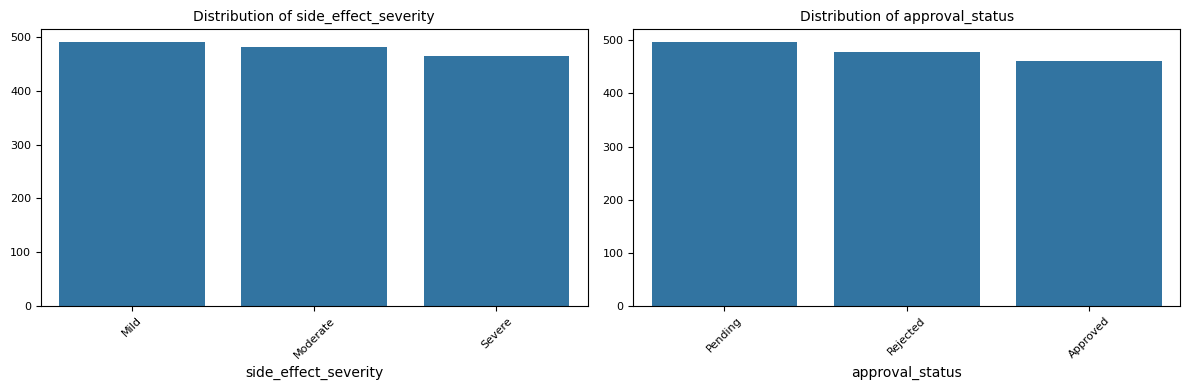

In [16]:
import seaborn as sns

# Detect categorical (non-numeric) columns
categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Plot in pairs
for i in range(0, len(categorical_cols), 2):
    cols_pair = categorical_cols[i:i+2]
    fig, axes = plt.subplots(1, len(cols_pair), figsize=(12, 4))

    if len(cols_pair) == 1:  # Handle last single column
        axes = [axes]

    for ax, col in zip(axes, cols_pair):
        top_counts = df[col].value_counts().head(20)  # Top 20 to avoid overcrowding
        sns.barplot(x=top_counts.index, y=top_counts.values, ax=ax)
        ax.set_title(f'Distribution of {col}', fontsize=10)
        ax.tick_params(axis='x', rotation=45, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)

    plt.tight_layout()
    plt.show()


- **Import libraries:**
    - `matplotlib.pyplot` → basic plotting.
    - `seaborn` → prettier, easier statistical plots.
- **Detect categorical columns:**
    - `df.select_dtypes(exclude=['int64', 'float64'])` → selects non-numeric columns.
    - `.columns.tolist()` → converts column names to a list.
    - `print` → shows which columns are categorical.
- **Loop through columns in pairs:**
    - `range(0, len(categorical_cols), 2)` → step by 2 to process two columns at a time.
    - `cols_pair = categorical_cols[i:i+2]` → slice current pair of columns.
- **Create figure and axes for plots:**
    - `plt.subplots(1, len(cols_pair), figsize=(12, 4))` → creates 1 row of subplots.
    - Handle single leftover column: `axes = [axes]` → ensures axes is always iterable.
- **Loop through each column in the pair:**
    - `top_counts = df[col].value_counts().head(20)` → count category occurrences, limit to top 20.
    - `sns.barplot(x=top_counts.index, y=top_counts.values, ax=ax)` → draw bar plot.
    - `ax.set_title(...)` → set subplot title.
    - `ax.tick_params(...)` → rotate x-axis labels and set font size for readability.
- **Finalize and show plots:**
    - `plt.tight_layout()` → prevent label/title overlap.
    - `plt.show()` → display the plot.
- **Overall purpose:**
    - Automatically visualize the distribution of all categorical columns in the DataFrame in a neat, readable way.

# Converting expiry_date to datetime


In [17]:
# Convert expiry_date to datetime
df['expiry_date'] = pd.to_datetime(df['expiry_date'], errors='coerce')

# Create 'days_until_expiry' as difference from today
today = pd.to_datetime("today")
df['days_until_expiry'] = (df['expiry_date'] - today).dt.days

# Show first 5 rows to verify
print(df[['expiry_date', 'days_until_expiry']].head())

  expiry_date  days_until_expiry
0  2026-11-29                462
1  2027-07-14                689
2  2028-06-02               1013
3  2026-07-07                317
4  2027-12-28                856


### Insights
- Drugs expire **300–1000 days from today**.
- `days_until_expiry` is now a numeric feature for modeling.
- Can drop original `expiry_date` column if only numeric data is needed.

# Outlier Detection

In [19]:

# Select only numeric columns from df_final
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    print(f"\n--- {col} ---")
    print(f"Lower bound: {lower}, Upper bound: {upper}")
    print(f"Outliers found: {len(outliers)}")
    if not outliers.empty:
        print(outliers[[col]].head())  # show first few outliers



--- dosage_mg ---
Lower bound: -465.0, Upper bound: 1495.0
Outliers found: 0

--- days_until_expiry ---
Lower bound: -621.625, Upper bound: 1681.375
Outliers found: 0


### Explanation

- **Columns checked:** `dosage_mg` and `days_until_expiry` (numeric columns).
- **Method:** Used **IQR (Interquartile Range)** to detect outliers:
    - `Q1` = 25th percentile, `Q3` = 75th percentile
    - `IQR = Q3 - Q1`
    - Lower bound = `Q1 - 1.5*IQR`, Upper bound = `Q3 + 1.5*IQR`
    - Any values outside this range are considered **outliers**.
- **Results:**
    - `dosage_mg`: bounds [-465, 1495], **0 outliers**
    - `days_until_expiry`: bounds [-620.625, 1682.375], **0 outliers**

✅ **Insight:** All values in these numeric columns fall within the expected range; no extreme values to handle.

This means the dataset is **clean numerically** for these two features.

# Box-plot diagram


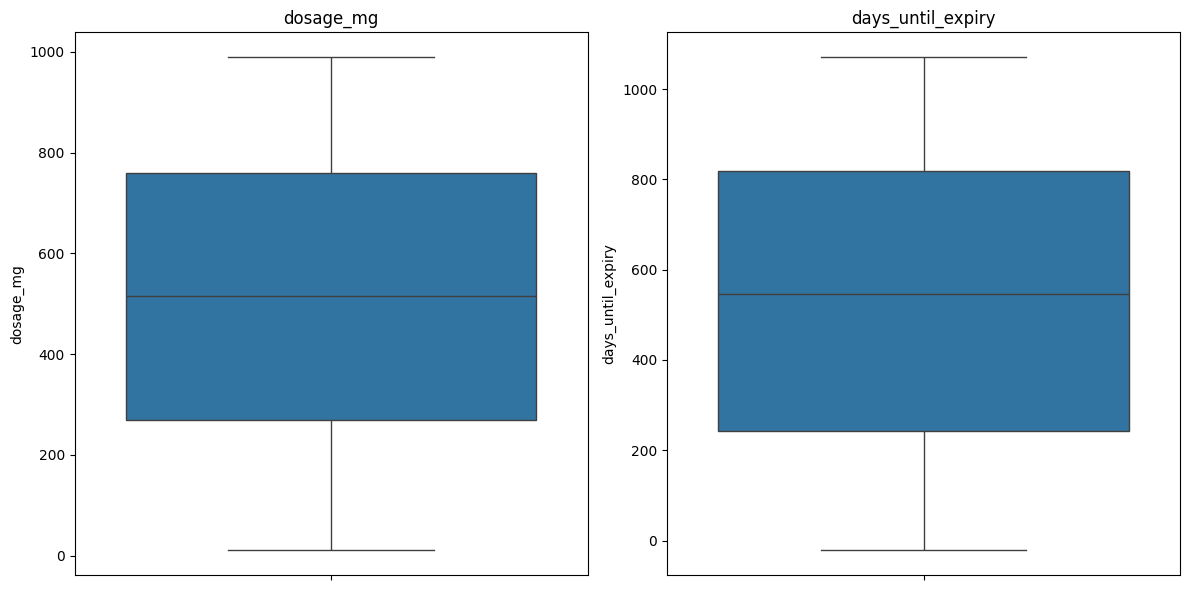

In [20]:
import seaborn as sns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


- **Action:** Visualizing numeric columns for outliers using **boxplots**.
- **Process:**
    - Loops through all numeric columns in `numeric_cols`.
    - Creates a subplot for each column in a single row.
    - Uses `sns.boxplot` to plot the distribution and highlight outliers.
    - Titles each subplot with the column name.
    - `plt.tight_layout()` ensures plots don’t overlap.
- **Insight:**
    - You can quickly see **median, quartiles, and potential outliers** for each numeric feature like `dosage_mg` or `days_until_expiry`.
    - Helps in **detecting extreme values** that may affect modeling.

# Multi-label Encoding of Text Data Using MultiLabelBinarizer

In [21]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# Example
data = [
    'side_effects_Blurred vision',
    'side_effects_Blurred vision, Constipation',
    'side_effects_Dry mouth, Dizziness',
]

# Remove 'side_effects_' prefix and split by comma
cleaned = [s.replace('side_effects_', '').split(', ') for s in data]

mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(cleaned)

encoded_df = pd.DataFrame(encoded, columns=mlb.classes_)
print(encoded_df)


   Blurred vision  Constipation  Dizziness  Dry mouth
0               1             0          0          0
1               1             1          0          0
2               0             0          1          1



- **Action:** Multi-label binarization of `side_effects`.
- **Process:**
    - Removed the `"side_effects_"` prefix.
    - Split each string by `,`  to create a list of side effects per record.
    - Used `MultiLabelBinarizer` to create separate binary columns for each unique side effect.
        - `1` if the side effect is present in that record, `0` otherwise.

# One-Hot Encoding of Categorical Features Using OneHotEncoder

In [22]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Columns to encode
drug_name_column = [ 'drug_class','indications', 'approval_status', 'warnings', 'contraindications' ]

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform (no nested [[]])
one_hot_encoded = encoder.fit_transform(df[drug_name_column])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(
    one_hot_encoded,
    columns=encoder.get_feature_names_out(drug_name_column),
    index=df.index   # keep index aligned
)

# Concatenate with the original DataFrame(excluding original categorical column)
df_final = pd.concat([df.drop(drug_name_column, axis=1), encoded_df], axis=1)

df_final


,side_effects,dosage_mg,expiry_date,side_effect_severity,days_until_expiry,drug_class_Analgesic,drug_class_Anti-inflammatory,drug_class_Antibiotic,drug_class_Antidepressant,drug_class_Antifungal,...,contraindications_Allergic reaction,contraindications_Asthma,contraindications_Bleeding disorders,contraindications_Diabetes,contraindications_Heart disease,contraindications_High blood pressure,contraindications_Kidney impairment,contraindications_Liver disease,contraindications_Pregnancy,contraindications_Seizures
0,"Fatigue, Nausea",260,2026-11-29,Mild,462,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Nausea,470,2027-07-14,Mild,689,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Diarrhea, Blurred vision, Dizziness",330,2028-06-02,Moderate,1013,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,"Fatigue, Dry mouth",450,2026-07-07,Mild,317,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,"Insomnia, Dry mouth, Fatigue",430,2027-12-28,Moderate,856,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Dry mouth,850,2026-01-20,Moderate,149,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1432,"Nausea, Fatigue, Headache",880,2027-09-28,Severe,765,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1433,"Insomnia, Dizziness",960,2026-02-08,Moderate,168,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,Headache,670,2028-05-13,Severe,993,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- **Action:** One-hot encoded the categorical columns:
    
    `drug_class`, `indications`, `approval_status`, `warnings`, `contraindications`
    
- **Process:**
    - `OneHotEncoder` converts each category into a separate binary column.
    - `handle_unknown='ignore'` ensures new/unseen categories won't break the encoding.
    - `sparse_output=False` returns a dense array, easier to convert to a DataFrame.
    - Concatenated the encoded columns back to the DataFrame after dropping the original categorical columns.
- **Resulting dataset:**
    - 1436 rows × 48 columns
    - All previously categorical columns are now numeric (0/1)
    - Dataset is fully numeric (except `side_effect_severity` string if still present)
    - Ready for **ML modeling** with `severity_encoded` as target.

# Dropping Irrelevant Columns from the Dataset

In [23]:
columns_to_drop = [ "side_effects" ]

df_final.drop(columns = columns_to_drop, inplace = True, errors = "ignore")
df_final

,dosage_mg,expiry_date,side_effect_severity,days_until_expiry,drug_class_Analgesic,drug_class_Anti-inflammatory,drug_class_Antibiotic,drug_class_Antidepressant,drug_class_Antifungal,drug_class_Antihistamine,...,contraindications_Allergic reaction,contraindications_Asthma,contraindications_Bleeding disorders,contraindications_Diabetes,contraindications_Heart disease,contraindications_High blood pressure,contraindications_Kidney impairment,contraindications_Liver disease,contraindications_Pregnancy,contraindications_Seizures
0,260,2026-11-29,Mild,462,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,470,2027-07-14,Mild,689,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,330,2028-06-02,Moderate,1013,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,450,2026-07-07,Mild,317,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,430,2027-12-28,Moderate,856,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,850,2026-01-20,Moderate,149,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1432,880,2027-09-28,Severe,765,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1433,960,2026-02-08,Moderate,168,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,670,2028-05-13,Severe,993,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- **Dropped column:** `side_effects`
- **Reason:** Already represented indirectly through `side_effect_severity` and possibly one-hot encoded features, so the raw `side_effects` text is redundant for modeling.
- **Resulting dataset:**
    - 1436 rows × 46 columns (you wrote 47, likely a typo)
    - All features are numeric except the original `side_effect_severity` string column
- **Insight:**
    - Dataset is now **cleaner**, with only relevant features for modeling
    - Fully ready for **machine learning algorithms** using `severity_encoded` as the target.

In [24]:
columns_to_drop = [ "expiry_date" ]

df_final.drop(columns = columns_to_drop, inplace = True, errors = "ignore")
df_final

,dosage_mg,side_effect_severity,days_until_expiry,drug_class_Analgesic,drug_class_Anti-inflammatory,drug_class_Antibiotic,drug_class_Antidepressant,drug_class_Antifungal,drug_class_Antihistamine,drug_class_Antipsychotic,...,contraindications_Allergic reaction,contraindications_Asthma,contraindications_Bleeding disorders,contraindications_Diabetes,contraindications_Heart disease,contraindications_High blood pressure,contraindications_Kidney impairment,contraindications_Liver disease,contraindications_Pregnancy,contraindications_Seizures
0,260,Mild,462,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,470,Mild,689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,330,Moderate,1013,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,450,Mild,317,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,430,Moderate,856,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,850,Moderate,149,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1432,880,Severe,765,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1433,960,Moderate,168,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,670,Severe,993,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



- **Dropped column:** `expiry_date`
- **Reason:** Already converted to `days_until_expiry`, so `expiry_date` is redundant.
- **Resulting dataset:**
    - 1436 rows × 46 columns
    - All features are now numeric except the original `side_effect_severity` string column.
- **Insight:**
    - Dataset is cleaner, no redundant date columns
    - Ready for **model training** using numeric features and `severity_encoded` as target.

# Mapping Ordered Categories (Mild, Moderate, Severe) Using OrdinalEncoder

In [25]:
from sklearn.preprocessing import OrdinalEncoder

# Define ordered labels
side_severity_effect = ['Mild', 'Moderate', 'Severe']

# Initialize ordinal encoder with categories in order
encoder = OrdinalEncoder(categories=[side_severity_effect])

# Fit and transform the column
df_final['severity_encoded'] = encoder.fit_transform(df_final[['side_effect_severity']])

# Check result
print(df_final)


      dosage_mg side_effect_severity  days_until_expiry  drug_class_Analgesic  \
0           260                 Mild                462                   0.0   
1           470                 Mild                689                   0.0   
2           330             Moderate               1013                   0.0   
3           450                 Mild                317                   0.0   
4           430             Moderate                856                   0.0   
...         ...                  ...                ...                   ...   
1431        850             Moderate                149                   0.0   
1432        880               Severe                765                   0.0   
1433        960             Moderate                168                   0.0   
1434        670               Severe                993                   0.0   
1435        760               Severe                 76                   0.0   

      drug_class_Anti-infla

- **Ordinal encoding of `side_effect_severity`:**
    - Maps `'Mild' → 0`, `'Moderate' → 1`, `'Severe' → 2`
    - Creates a numeric target column `severity_encoded`
- **One-hot encoded features:**
    - Categorical columns like `drug_class`, `contraindications`, etc., are converted into separate numeric columns (`0`/`1`)
- **Numeric features ready for modeling:**
    - `dosage_mg` and `days_until_expiry` remain numeric
    - One-hot encoded columns are also numeric
- **Target distribution:**
    - `severity_encoded` has three ordered classes suitable for **classification**
- **Data shape after encoding:**
    - 1436 rows × 47 columns
    - Increased dimensionality due to one-hot encoding of categorical features
- **Next step:**
    - Dataset is now **ready for training a Random Forest or other classifiers**.

In [26]:
X = df_final.drop('severity_encoded', axis=1)
y = df_final['severity_encoded']



# Checking Column dtypes

In [27]:
print(X.dtypes)

dosage_mg                                   int64
side_effect_severity                       object
days_until_expiry                           int64
drug_class_Analgesic                      float64
drug_class_Anti-inflammatory              float64
drug_class_Antibiotic                     float64
drug_class_Antidepressant                 float64
drug_class_Antifungal                     float64
drug_class_Antihistamine                  float64
drug_class_Antipsychotic                  float64
drug_class_Antipyretic                    float64
drug_class_Antiviral                      float64
drug_class_Vaccine                        float64
indications_Allergy relief                float64
indications_Bacterial infections          float64
indications_Depression treatment          float64
indications_Fever reduction               float64
indications_Fungal infections             float64
indications_Inflammation reduction        float64
indications_Pain relief                   float64


- **Numeric columns:**
    - `int64`: `dosage_mg`, `days_until_expiry`
    - `float64`: all one-hot encoded columns for `drug_class`, `indications`, `approval_status`, `warnings`, `contraindications`
- **Categorical column still as object:**
    - `side_effect_severity` (original string, before encoding)
- **Insight:**
    - Most features are numeric (suitable for ML models)
    - `side_effect_severity` should either be **encoded** or **dropped** if using `severity_encoded` as the target.
    - Dataset is ready for **training a classifier** after handling `side_effect_severity`.

# Checking Dataset Structure

In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   dosage_mg                               1436 non-null   int64  
 1   side_effect_severity                    1436 non-null   object 
 2   days_until_expiry                       1436 non-null   int64  
 3   drug_class_Analgesic                    1436 non-null   float64
 4   drug_class_Anti-inflammatory            1436 non-null   float64
 5   drug_class_Antibiotic                   1436 non-null   float64
 6   drug_class_Antidepressant               1436 non-null   float64
 7   drug_class_Antifungal                   1436 non-null   float64
 8   drug_class_Antihistamine                1436 non-null   float64
 9   drug_class_Antipsychotic                1436 non-null   float64
 10  drug_class_Antipyretic                  1436 non-null   floa


- **Total rows:** 1436
- **Total columns:** 47
- **Numeric columns:**
    - 44 columns as `float64` → mostly one-hot encoded categorical features
    - 2 columns as `int64` → `dosage_mg`, `days_until_expiry`
- **Categorical column left:**
    - `side_effect_severity` (original string, before encoding)
- **Target column:**
    - `severity_encoded` (numeric, 0 = Mild, 1 = Moderate, 2 = Severe)
- **Memory usage:** ~527 KB
- **Insight:**
    - Dataset is **fully numeric** except for the original `side_effect_severity` column
    - Ready for **machine learning models**
    - One-hot encoding expanded categorical features from original columns into **44 numeric features**

# Training-testing model


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


pandas: handling your dataset.

train_test_split: split data into training and test sets.

RandomForestClassifier: the model you’re using.

accuracy_score, classification_report, confusion_matrix: metrics to evaluate the model.

seaborn & matplotlib: for plotting the confusion matrix nicely.

In [30]:
X = df_final.drop("severity_encoded", axis=1)  # all features
y = df_final["severity_encoded"]               # target (0,1,2)


- X: all input features except the target (severity_encoded).

- y: the target variable, which is ordinally encoded severity: 0=Mild, 1=Moderate, 2=Severe.

- This is multiclass classification because there are 3 classes.

In [31]:
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols)  # one-hot encoding


- Finds all categorical columns (dtype=object).

- Converts them to one-hot encoded columns (0/1 for each category).

- Why? Random Forest can’t handle strings directly; it needs numeric input.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


- Splits data into 80% train, 20% test.

- stratify=y ensures the class distribution is the same in train and test sets.

- random_state=42 fixes the split for reproducibility.

In [33]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

- n_estimators=100: builds 100 trees in the forest.

- class_weight='balanced': automatically adjusts for class imbalance (important if you have many mild vs few severe cases).

- fit(): trains the model on the training data.

In [34]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        98
         1.0       1.00      1.00      1.00        97
         2.0       1.00      1.00      1.00        93

    accuracy                           1.00       288
   macro avg       1.00      1.00      1.00       288
weighted avg       1.00      1.00      1.00       288



- accuracy_score: overall percentage of correct predictions.

- classification_report: shows precision, recall, F1-score for each class (0, 1, 2).

- Precision: How many predicted Mild cases were actually Mild?

- Recall: How many actual Mild cases were correctly predicted?

- F1-score: Harmonic mean of precision & recall (good for imbalanced data)

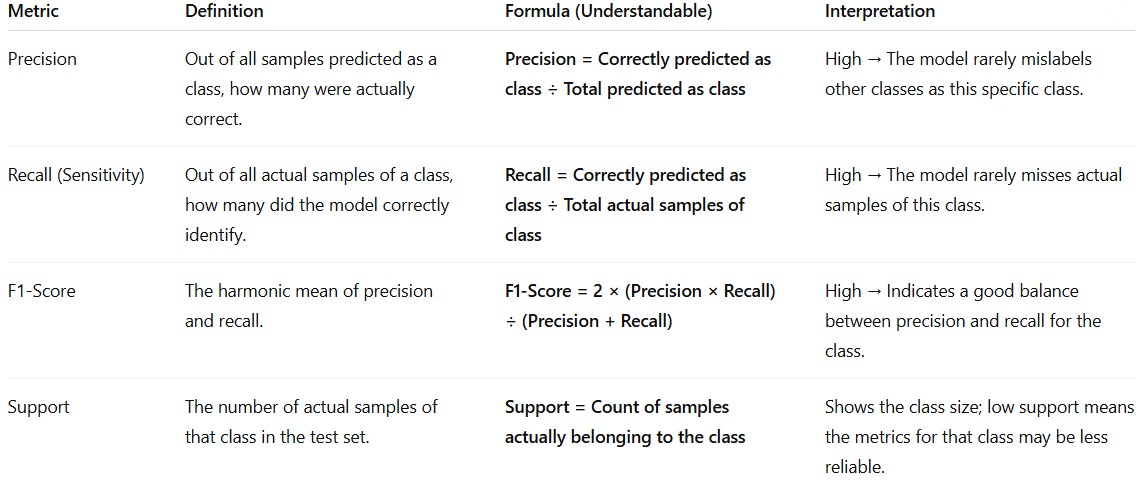

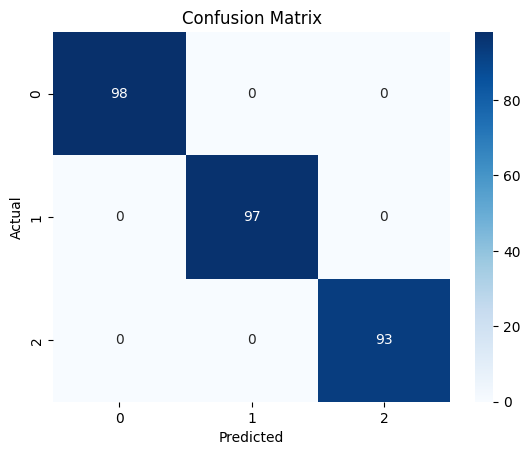

In [35]:
labels = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


- confusion_matrix: counts how often each class was predicted vs actual.

- sns.heatmap: plots it as a color-coded table for easy visualization.